### Ridge Regression
- also known as **"L2 Regularization"**
- used to Reduce Overfitting (when train data accuracy is very high but test data is very poor)
- **How it is reducing ovrefitting, because it is reducing the impact by reducing the value of coefficient of the feature that are not directly correlated with the output feature**
- in order to reduce the overfitting in the linear regression, we use Ridge regression algorithm

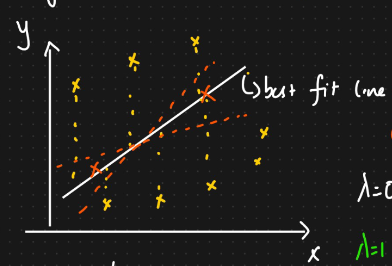
- a new algorithm which actually help us to hyperparameter tune the linear regression
- overfitting means our cost function is becoming zero, so to avoid the overfitting we will make sure that cost function will never become zero by adding hyperparameter(λ) and summation of slope squares (coefficient square)

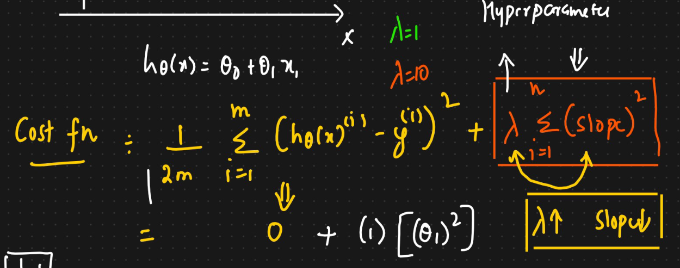

### IMP: Relationship between λ and slope square
- **when λ is increasing, slope is decreasing**
- remember slope or coefficient value will never become zero, as we keep on increasing the λ
- when λ=0, then liner regression is getting applied and not ridge regression and additional ridge part become zero
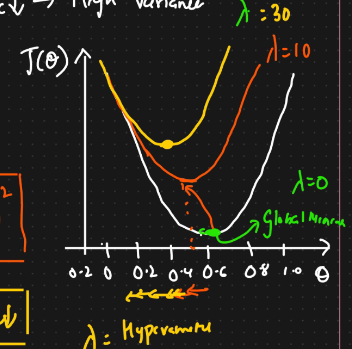

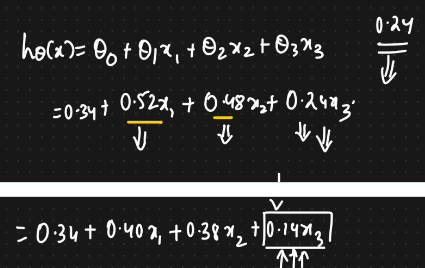